In [2]:
import pandas as pd

import math

import scipy.stats as stats

from matplotlib import pyplot as plt

import numpy as np

pd.options.display.min_rows = 20

pd.options.display.max_rows = 20

In [62]:
mangan = pd.read_csv("Mangan.csv")
mangan = pd.DataFrame(mangan[["'ODLITEK1\'", "'ODLITEK2\'", "'ODLITEK3\'", "'ODLITEK4\'", "'ODLITEK5\'"]]
                        .unstack().reset_index(drop=True), columns=["ODLITEK"])
odlitek = mangan["ODLITEK"]
urejeni_odlitek = odlitek.sort_values(ignore_index=True)
n = len(odlitek)
print(urejeni_odlitek)

0      1.06
1      1.08
2      1.08
3      1.10
4      1.10
5      1.16
6      1.16
7      1.16
8      1.18
9      1.18
       ... 
110    1.62
111    1.62
112    1.62
113    1.64
114    1.70
115    1.72
116    1.72
117    1.76
118    1.76
119    1.80
Name: ODLITEK, Length: 120, dtype: float64


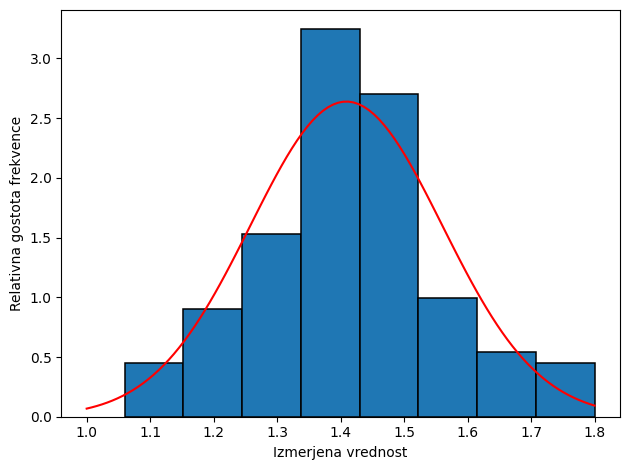

0.17999999999999994 0.09488235113094502 1.409 0.151182454186263


In [57]:
Q1, Q3 = odlitek.quantile([.25, .75])
IQR = Q3 - Q1
sirina = 2.6 * IQR / pow(120, 1/3)
stevilo = int((odlitek.max() - odlitek.min())/sirina + 1)
mi, sigma = odlitek.mean(), odlitek.std()

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(odlitek, stevilo, density=True, edgecolor="black", linewidth=1.1)
ax.set_xlabel("Izmerjena vrednost")
ax.set_ylabel("Relativna gostota frekvence")
ax.grid(False)
x = np.linspace(1.0, 1.8, 100)
plt.plot(x, stats.norm.pdf(x, mi, sigma), "r")
plt.tight_layout()
plt.show()
print(IQR, sirina, mi, sigma)

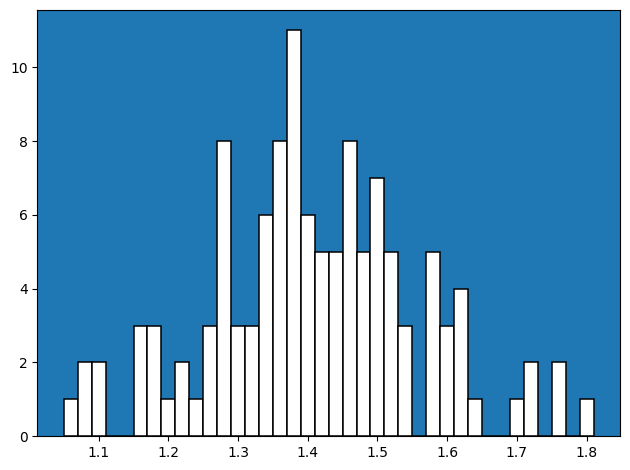

In [174]:
x_alt = np.linspace(1.05, 1.81, 39)
x_alt_mid = (x_alt[1:] + x_alt[:-1]) / 2
koreni_razlik_alt = np.empty(38)
stevec_alt = 0
for i in x_alt_mid:
    if stevec_alt == 0:
        dejanska_frekvenca = len(odlitek[odlitek.between(x_alt[stevec_alt], x_alt[stevec_alt + 1])])
    else:
        dejanska_frekvenca = len(odlitek[odlitek.between(x_alt[stevec_alt], x_alt[stevec_alt + 1], inclusive="right")])
    koreni_razlik_alt[stevec_alt] = dejanska_frekvenca
    stevec_alt += 1

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.bar(x_alt_mid, koreni_razlik_alt, 0.02, bottom=None, align='center', color="#FFFFFF", edgecolor="black", linewidth=1.1)
#ax.set_title("Bin Width Determination via Freedman Diaconis Rule", fontsize=14, loc="left", color="red")
#ax.set_ylabel("Density", fontsize=12, color="#000000")
ax.grid(False)
ax.set_facecolor(None)
plt.tight_layout()
plt.show()

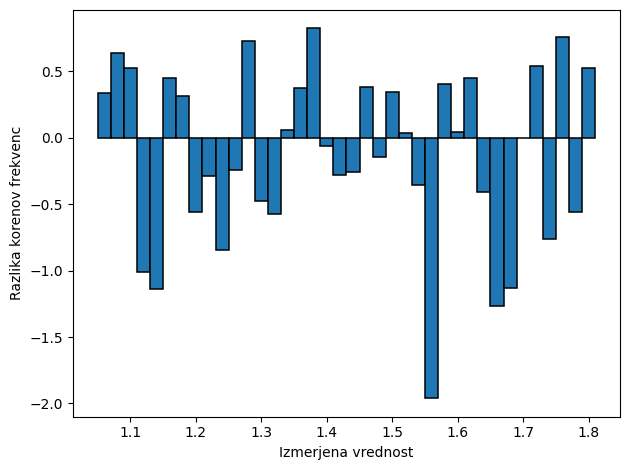

In [63]:
x = np.linspace(1.05, 1.81, 39)
x_mid = (x[1:] + x[:-1])/2
frekvence = odlitek.value_counts()
koreni_razlik = np.empty(38)
stevec = 0
for i in x_mid:
    pricakovana_frekvenca = (stats.norm.cdf((i+ 0.01 - mi)/sigma) - stats.norm.cdf((i- 0.01 - mi)/sigma))*n
    if stevec == 0:
        dejanska_frekvenca = len(odlitek[odlitek.between(x[stevec], x[stevec + 1])])
    else:
        dejanska_frekvenca = len(odlitek[odlitek.between(x[stevec], x[stevec + 1], inclusive="right")])
    koreni_razlik[stevec] = math.sqrt(dejanska_frekvenca) - math.sqrt(pricakovana_frekvenca)
    stevec += 1

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.bar(x_mid, koreni_razlik, width=0.02, bottom=None, align='center', edgecolor="black", linewidth=1.1)
ax.grid(False)
ax.set_xlabel("Izmerjena vrednost")
ax.set_ylabel("Razlika korenov frekvenc")
plt.tight_layout()
plt.show()


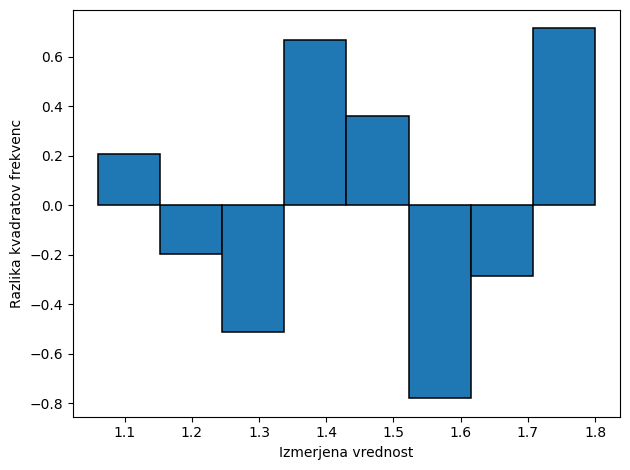

In [64]:
x_alt = np.linspace(1.06, 1.80, 9)
x_alt_mid = (x_alt[1:] + x_alt[:-1]) / 2
koreni_razlik_alt = np.empty(8)
stevec_alt = 0
for i in x_alt_mid:
    pricakovana_frekvenca = (stats.norm.cdf((i + (0.74/8)/2 - mi)/sigma) - stats.norm.cdf((i - (0.74/8)/2 - mi)/sigma))*n
    if stevec_alt == 0:
        dejanska_frekvenca = len(odlitek[odlitek.between(x_alt[stevec_alt], x_alt[stevec_alt + 1])])
    else:
        dejanska_frekvenca = len(odlitek[odlitek.between(x_alt[stevec_alt], x_alt[stevec_alt + 1], inclusive="right")])
    koreni_razlik_alt[stevec_alt] = math.sqrt(dejanska_frekvenca) - math.sqrt(pricakovana_frekvenca)
    stevec_alt += 1

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.bar(x_alt_mid, koreni_razlik_alt, 0.74/8, bottom=None, align='center', edgecolor="black", linewidth=1.1)
ax.set_xlabel("Izmerjena vrednost")
ax.set_ylabel("Razlika kvadratov frekvenc")
ax.grid(False)
plt.tight_layout()
plt.show()


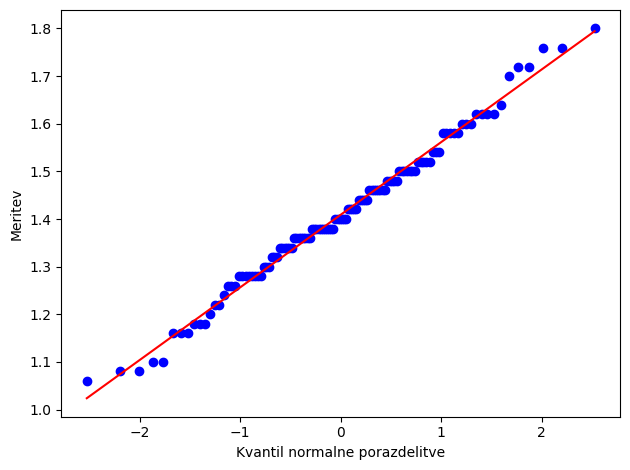

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=1)
stats.probplot(odlitek, dist="norm", plot=plt)
ax.set_title(None)
ax.set_xlabel("Kvantil normalne porazdelitve")
ax.set_ylabel("Meritev")
ax.grid(False)
plt.tight_layout()
plt.show()

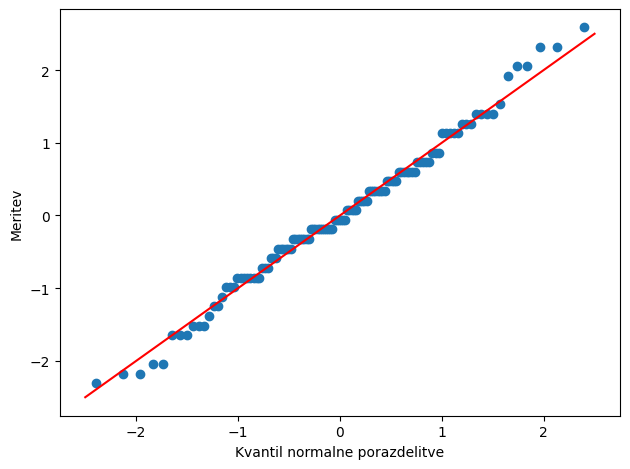

In [52]:
y = (urejeni_odlitek.to_numpy() - mi*np.ones(120))*(1/sigma)
phi = lambda x: stats.norm.ppf(x)
x = phi(np.arange(1/121, 1.0, 1/121))

fig, ax = plt.subplots(nrows=1, ncols=1)
plt.scatter(x, y)
ax.set_xlabel("Kvantil normalne porazdelitve")
ax.set_ylabel("Meritev")
plt.plot(np.linspace(-2.5, 2.5, 100), np.linspace(-2.5, 2.5, 100), c="red")
ax.grid(False)
plt.tight_layout()
plt.show()